# Python Plots for LGalaxies

## Import Libraries and Read Catalogs

<p>Use functions read_snap or read_tree to read catalogs. These are both defined in procedures.py. In case of read_snap, SnapshotList will be returned containing the list of snapshots read (usefull to later select galaxies in a given redshift).<p>

In [28]:
#need numpy, matplotlib, astropy, scipy

import numpy as np
%matplotlib inline

#import pandas as pd

%pylab inline
#import seaborn as sns
#sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *
import sys
from scipy.ndimage import zoom 

import procedures
reload (procedures)
from procedures import *
import plots_input
reload (plots_input)
from plots_input import *

FirstFile = 0
LastFile =  0

Volume_MR = (BoxSize_MR**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 
#Volume_MRII = (BoxSize_MRII**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 

if CatalogType=='snap':
    from LGalaxies_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_Henriques2015a_struct import PropertiesToRead
    #from LGalaxies_Henriques2015a_Rings_struct import LGalaxiesStruct
    #from LGalaxies_Henriques2015a_Rings_struct import PropertiesToRead
    (G_MR, SnapshotList) = read_snap(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead,LGalaxiesStruct,RedshiftsToRead,FullRedshiftList)
    
if CatalogType=='tree':    
    from LGalaxies_tree_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_tree_Henriques2015a_struct import PropertiesToRead_tree    
    (G_MR) = read_tree(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead_tree,LGalaxiesStruct)    
     
    SnapshotList = np.zeros(len(RedshiftList),dtype=np.int32)
    for ii in range(0,len(RedshiftList)):                  
        G0=G_MR[ np.rint(G_MR['Redshift']*100.) == RedshiftList[ii]*100. ]             
        SnapshotList[ii]=G0['SnapNum'][0]
#endif      

print('reading done\n')
#print (np.log10(G_MR['DiskMass'][0:99]*1.e10))
#print (np.log10(G_MR['BulgeMass'][0:99]*1.e10))
#print (np.log10(G_MR['Mvir'][0:99]*1.e10))
#print (G_MR['SnapNum'][0:99])

#print (np.log10(G_MR['MetalsStellarMass'][0:99]*1.e10))
#print (G_MR[0:5])
#help(G_MR)


plt.rcParams.update({'font.size': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.linewidth': 2, 
                     'xtick.major.size': 6, 'xtick.major.width': 1.5, 
                     'ytick.major.size': 6, 'ytick.major.width': 1.5, 
                     'xtick.minor.size': 3, 'xtick.minor.width': 1.,                   
                     'ytick.minor.size': 3, 'ytick.minor.width': 1.})

Populating the interactive namespace from numpy and matplotlib


Reading Headers

z= 0.00  nGals =  [671]



Reading redshift:  0.0 

File  0  nGals =  458
reading done



## Plots

In [29]:
import plots
reload (plots)

import plots_input
reload(plots_input)

<module 'plots_input' from '/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots_input.py'>

Doing SMF


FileNotFoundError: [Errno 2] No such file or directory: '/Users/BrunoHenriques/Desktop/OneDrive/Workspace/GitHub_PR_Hen15/MCMC//ObsConstraints/StellarMassFunction_z0.00.txt'

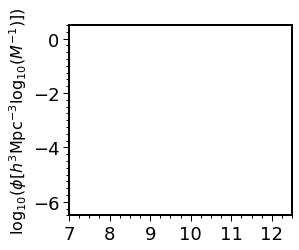

In [32]:

with PdfPages('./fig/plots.pdf') as pdf:  
    import procedures
    reload (procedures)
    from procedures import *
    import plots_input
    reload (plots_input)
    from plots_input import *
    import plots
    reload (plots)

    if opt_stellar_mass_vs_halo_mass==1:
        print('Doing SMHM')
        from plots import stellar_mass_vs_halo_mass
        ThisRedshiftList=[0.0]        
        stellar_mass_vs_halo_mass(G_MR, ThisRedshiftList, pdf)
    
    if opt_stellar_mass_function==1:
        print('Doing SMF')
        from plots import stellar_mass_function
        ThisRedshiftList=[0.0]        
        stellar_mass_function(G_MR, Volume_MR, ThisRedshiftList, pdf)
    
    if opt_metals_vs_stellarmass==1:
        print('Doing metals_vs_stellarmass')
        from plots import metals_vs_stellarmass
        ThisRedshiftList=[0.1,3.]
        metals_vs_stellarmass(G_MR, ThisRedshiftList, pdf)
        
    if opt_BHBM==1:
        print('Doing BHBM')
        from plots import BHBM
        ThisRedshiftList=[0.0]        
        BHBM(G_MR, ThisRedshiftList, pdf)    
        
    if opt_SFRF==1:
        print('Doing SFRF')
        from plots import SFRF
        ThisRedshiftList=[0.0]        
        SFRF(G_MR, Volume_MR, ThisRedshiftList, pdf)
        
    if opt_gas_fraction==1:
        print('Doing gas_fraction')
        from plots import gas_fraction
        ThisRedshiftList=[0.0]        
        gas_fraction(G_MR, ThisRedshiftList, pdf)
        
    if opt_HI_MF==1:
        print('Doing HI_MF')
        from plots import HI_MF
        ThisRedshiftList=[0.0]        
        HI_MF(G_MR, Volume_MR, ThisRedshiftList, pdf)
        
    if opt_sfr_vs_stellar_mass==1:
        print('Doing sfr_vs_stellar_mass')
        from plots import sfr_vs_stellar_mass
        ThisRedshiftList=[0.0,0.4,1.0,2.0,3.0]        
        sfr_vs_stellar_mass(G_MR, ThisRedshiftList, pdf)
        
    if opt_ur_vs_r==1:
        print('Doing ur_vs_r')
        from plots import ur_vs_r
        ThisRedshiftList=[0.0]        
        ur_vs_r(G_MR, ThisRedshiftList, pdf)
        
    if opt_UVJ_colour==1:
        print('Doing UVJ_colour')
        from plots import UVJ_colour
        ThisRedshiftList=[0.4,1.0,2.0,3.0]        
        UVJ_colour(G_MR, ThisRedshiftList, pdf)
        
    if opt_redfraction_color_cut==1:
        print('Doing redfraction_color_cut')
        from plots import redfraction_color_cut
        ThisRedshiftList=[0.0,0.4,1.0,2.0,3.0]        
        redfraction_color_cut(G_MR, ThisRedshiftList, pdf)
               
    print('')
    print('All plots done')
        
#end with PdfPages('./fig/plots.pdf') as pdf: 